In [4]:
""" Import Libraries """

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import os

os.getcwd()

'C:\\Users\\moche\\Documents\\Working Programs'

In [5]:
""" Import data from .csv into a numpy array and perform PCA """

" Make data array "
df = pd.read_csv('Lip_space_time-17-Nov-2021.csv')
data = df.to_numpy()

" Remove NaN columns "
adj_data = np.delete(data,[7,12,13,14],1) # Removed PI45P2, Carmil, ArpB & PI4P columns 

print(df)

            x   t  curvature       PIP3   LifeAct       NAP    PI34P2  PI45P2  \
0    4.000000 -60   0.032085   1.259733  1.064708  1.113695  1.125664     NaN   
1    4.000000 -57   0.033874   1.252147  0.965258  1.060444  1.077171     NaN   
2    4.000000 -54   0.033550   1.404829  0.869329  1.020091  1.003469     NaN   
3    4.000000 -51   0.034951   1.334462  0.892470  1.038189  1.061488     NaN   
4    4.000000 -48   0.028391   1.124881  0.879124  1.046749  0.977287     NaN   
..        ...  ..        ...        ...       ...       ...       ...     ...   
815 -2.149249 -15  -0.210964  13.760881  6.620512  0.720635  2.163126     NaN   
816 -2.172579 -12  -0.188980  13.273090  6.449913  0.822756  1.962913     NaN   
817 -2.256668  -9  -0.204499  14.720457  6.725740  0.826510  1.762699     NaN   
818 -2.396042  -6  -0.287903  16.591508  6.945560  0.795949  1.562486     NaN   
819 -2.613560  -3  -0.390188  17.313876  6.589804  0.793550  1.362272     NaN   

         PTEN     Myo1B    

[[ 0.39085845 -0.0126817   0.00349888 -0.04445307 -0.2340034   0.08898667
   0.05550575  0.38954778  0.76077248  0.10929798 -0.19197688]
 [-0.00414347 -0.17234878 -0.94661358  0.01004435  0.12621919  0.21493027
  -0.02894423 -0.07957895  0.06536914 -0.02233477  0.00563251]
 [ 0.27506812  0.42963663 -0.07256654 -0.29346274 -0.03017954 -0.21315424
  -0.36466039 -0.30541949  0.21329523 -0.34322594  0.46093482]
 [-0.3789118  -0.11338914  0.15703133  0.12599486 -0.00516771  0.20683905
   0.09483224 -0.62101494  0.46639048 -0.29865302 -0.24261016]
 [-0.36721474  0.21106418 -0.02470756 -0.09625167  0.08641686  0.13085726
  -0.20108675  0.54139121 -0.03243008 -0.63078451 -0.23164147]
 [-0.17748533  0.51689195 -0.01043008 -0.19369412 -0.35317268  0.64410857
   0.16102319 -0.03588301 -0.09653911  0.26926052  0.12268497]
 [-0.32134969 -0.17781128 -0.15882998  0.0658761  -0.82709643 -0.36274601
  -0.09411361  0.03468235 -0.02886188 -0.0357932   0.0877686 ]
 [ 0.36984555 -0.15406171  0.00679748 -0.

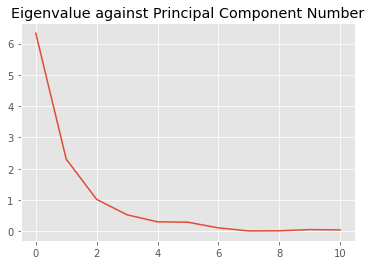

In [6]:
" PCA Cell "

" Normalise columns"

def standardize_data(arr):
    
    '''
    This function standardize an array, its substracts mean value, 
    and then divide the standard deviation.
    
    param 1: array 
    return: standardized array
    '''    
    rows, columns = arr.shape
    
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    
    for column in range(columns):
        
        mean = np.mean(arr[:,column])
        std = np.std(arr[:,column])
        tempArray = np.empty(0)
        
        for element in arr[:,column]:
            
            tempArray = np.append(tempArray, ((element - mean) / std))
 
        standardizedArray[:,column] = tempArray
    
    return standardizedArray

cov_mat = np.cov(standardize_data(adj_data), rowvar=False)

eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
#print("Eigenvector: \n",eigen_vectors,"\n")
#print("Eigenvalues: \n", eigen_values, "\n")

plt.style.use('ggplot')
plt.title("Eigenvalue against Principal Component Number")
print(eigen_vectors)
plt.plot(eigen_values)

In [14]:
" Data Processing "

def dc_dt(c_arr, t_int, mov_len):
    
    """
    - Function to calculate the corresponding rate of change of flux w.r.t time.
    - Under assumption that input c_arr follows time scheme given in df of input data.
    - First 19 values are calculated with constant time interval 3s, 20th automatically
      set to zero. 
    
    Inputs: c_arr(array(1D))
    Outputs: dc_arr(array(1D))
    
    """
    
    num_of_elements = len(c_arr) 
    num_of_movies = num_of_elements/mov_len
    
    zero_ind_arr = np.subtract(np.multiply(np.arange(1,num_of_movies+1),mov_len),1)
    dc_arr = np.empty([num_of_elements,1])
    
    for value in range(num_of_elements-1):
        
        dc_arr[value]= (c_arr[value+1]-c_arr[value])/t_int
    
    for index in range(len(zero_ind_arr)):
        
        dc_arr[int(zero_ind_arr[index])] = 0
    
    return dc_arr

print(dc_dt(adj_data[:,3],3,20))




[[-2.52855069e-03]
 [ 5.08940190e-02]
 [-2.34557631e-02]
 [-6.98603607e-02]
 [-1.96436859e-02]
 [-1.72876571e-03]
 [ 8.49117028e-03]
 [-1.82907170e-02]
 [-8.74870632e-03]
 [ 2.16314703e-02]
 [ 3.20133023e-02]
 [ 2.07165341e-02]
 [ 2.24758848e-02]
 [ 2.76860366e-02]
 [-1.09413786e-02]
 [-2.70775082e-02]
 [-2.12277328e-02]
 [ 2.94033798e-02]
 [ 4.88591925e-02]
 [ 0.00000000e+00]
 [-3.90391566e-03]
 [ 4.20366159e-02]
 [-2.01148227e-02]
 [-6.22151246e-02]
 [-3.15160824e-02]
 [-7.26649252e-03]
 [ 7.80192575e-03]
 [-2.05610776e-02]
 [-1.47663952e-02]
 [ 2.34008551e-02]
 [ 4.24305246e-02]
 [ 1.87222805e-02]
 [ 2.89775627e-02]
 [ 4.15175009e-02]
 [-7.00271338e-03]
 [-2.91254341e-02]
 [-2.74240726e-02]
 [ 2.93323943e-02]
 [ 3.81066838e-02]
 [ 0.00000000e+00]
 [ 3.54199400e-04]
 [ 3.21595219e-02]
 [-2.10597096e-02]
 [-5.27254858e-02]
 [-3.51315317e-02]
 [-1.48581591e-02]
 [-8.52535843e-05]
 [-2.69279518e-02]
 [-2.01523057e-02]
 [ 3.65499164e-02]
 [ 4.84430815e-02]
 [ 1.89573560e-02]
 [ 3.1715712

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)


plt.scatter(adj_data[:,3], adj_data[:,5], marker='x',color='black')

In [ ]:
ax.quiver()